<a href="https://colab.research.google.com/github/jhkang0516/Mogakso/blob/main/%EC%B5%9C%EC%A2%85_%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1_%EB%8D%B0%EC%9D%B4%EC%BD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
torch.cuda.is_available()

True

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import torch.nn
import warnings
warnings.filterwarnings("ignore")
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
import os
import os.path as pth

from multiprocessing import Pool
from functools import partial

from tqdm.notebook import tqdm

import zipfile

In [23]:
# Load the data
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HousePrice/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HousePrice/test.csv')


In [24]:
X = train_data.drop(columns=['ID', 'MEDV'])
y = train_data['MEDV']

In [25]:
del test_data['ID']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     455 non-null    float64
 1   ZN       455 non-null    float64
 2   INDUS    455 non-null    float64
 3   CHAS     455 non-null    float64
 4   NOX      455 non-null    float64
 5   RM       455 non-null    float64
 6   AGE      455 non-null    float64
 7   DIS      455 non-null    float64
 8   RAD      455 non-null    float64
 9   TAX      455 non-null    float64
 10  PTRATIO  455 non-null    float64
 11  B        455 non-null    float64
 12  LSTAT    455 non-null    float64
dtypes: float64(13)
memory usage: 46.3 KB


In [ ]:
print(X.isna().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


In [ ]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,3.659998,11.165934,11.092747,0.065934,0.555160,6.285352,68.320440,3.788439,9.551648,407.892308,18.453846,356.285714,12.604967
std,8.888075,22.953757,6.821697,0.248440,0.116524,0.699346,27.893807,2.082031,8.718624,169.446805,2.149137,92.664335,7.090388
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.079230,0.000000,5.160000,0.000000,0.449000,5.881000,44.700000,2.100350,4.000000,278.000000,17.400000,375.990000,6.970000
50%,0.245220,0.000000,9.690000,0.000000,0.538000,6.208000,76.700000,3.199200,5.000000,330.000000,19.000000,391.700000,11.280000
75%,3.685665,12.500000,18.100000,0.000000,0.624000,6.627000,93.850000,5.164950,24.000000,666.000000,20.200000,396.375000,16.695000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [ ]:
data = pd.concat((X,test_data),axis = 0)

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [26]:
data.columns

NameError: ignored

In [ ]:
len(data)

506

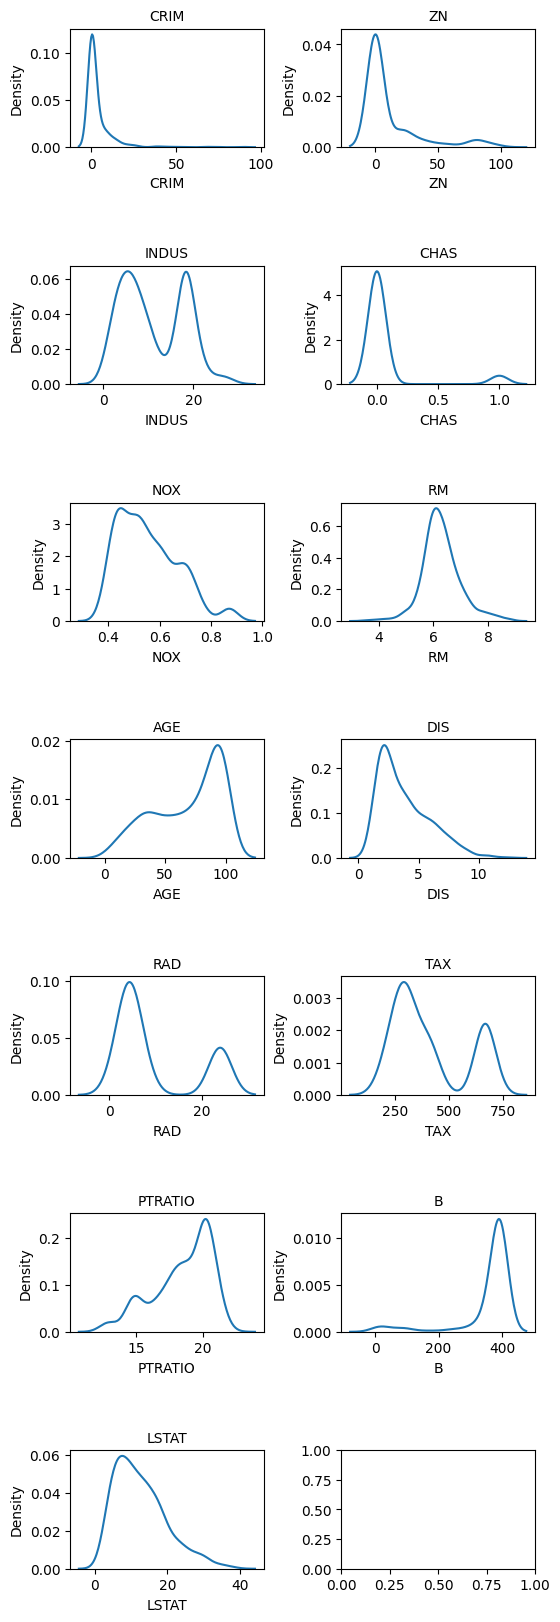

In [ ]:
fig, ax = plt.subplots(7, 2, figsize=(6, 20))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요.
plt.subplots_adjust(wspace=0.4, hspace=1)
# id 변수(count==0인 경우)는 제외하고 분포를 확인
count = 0
columns = data.columns
for row in range(7):
    for col in range(2):
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=10)
        count += 1
        if count == 13 :
            break

# Scaling
스케일링은 한마디로, x축의 값만 바꾸는 역할을 한다. 그래서 그래프의 모양은 변하지 않는다.

# Normalization(정규화)
그래프의 모양이 바뀐다. 한마디로, 한쪽으로 치우쳐져 있는 그래프를 정규화 시키면 그래프가 가운데쪽으로 이동한다. x축에만 적용되는게 아닌, y축 기준으로 아래쪽에만 분포해 있으면 y축을 정규화 시켜서 그래프 전체에 분포되게 바꿀 수도 있다.

출처 : https://www.kaggle.com/code/alexisbcook/scaling-and-normalization


In [28]:
# # Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_test = scaler.transform(test_data)

In [ ]:
  data['CRIM'] = np.log1p(data['CRIM'])

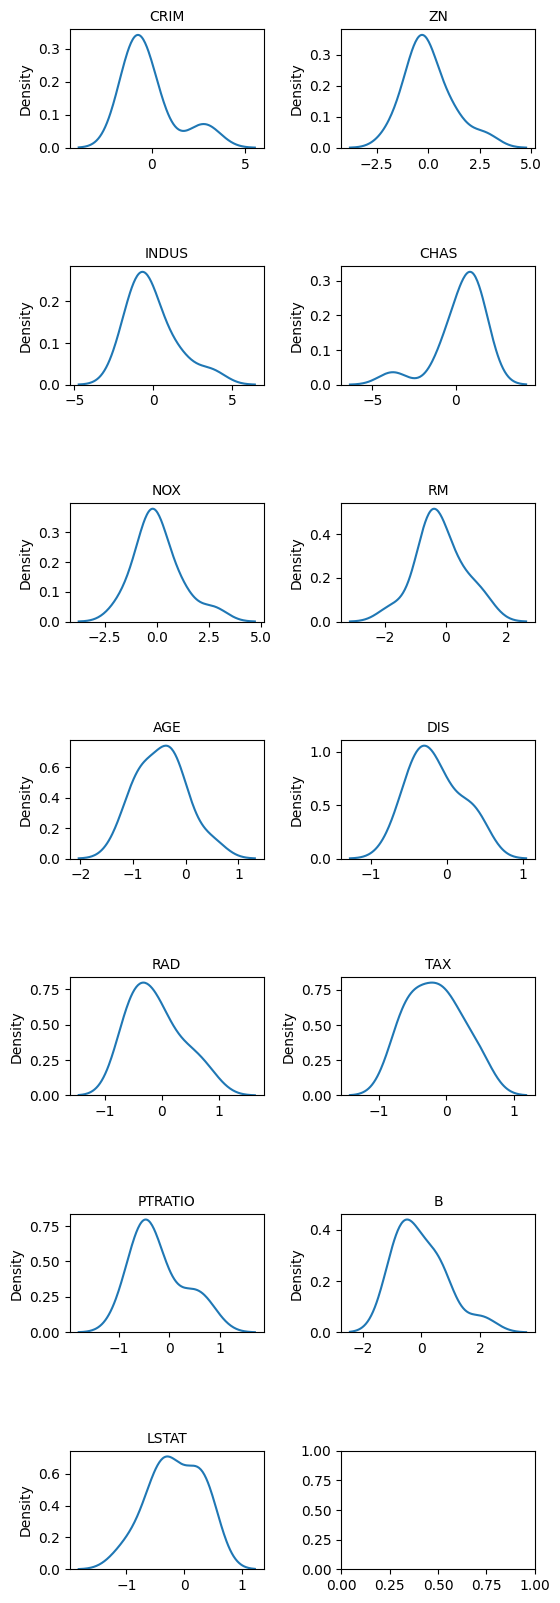

In [33]:
fig, ax = plt.subplots(7, 2, figsize=(6, 20))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요.
plt.subplots_adjust(wspace=0.4, hspace=1)
# id 변수(count==0인 경우)는 제외하고 분포를 확인
count = 0
columns = X.columns
for row in range(7):
    for col in range(2):
        sns.kdeplot(data=X_train[count], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=10)
        count += 1
        if count == 13 :
            break


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
scaler = RobustScaler()

scaler.fit(data)
data = scaler.transform(data)

In [8]:
X['CRIM'] = np.log1p(X['CRIM'])

In [9]:
scaler = RobustScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
type(data)

numpy.ndarray

In [34]:
X = pd.DataFrame(X_train)

In [35]:
X.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

In [38]:
X_test = pd.DataFrame(X_test)
X_test.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

In [12]:
test_data['CRIM'] = np.log1p(X['CRIM'])
scaler.fit(test_data)
test_data = scaler.transform(test_data)
test_data = pd.DataFrame(test_data)
test_data.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.117314,6.4,-0.467543,0.0,-0.834286,-0.134048,-0.909461,1.964726,-0.20,-0.038660,-0.928571,0.058376,-0.484319
1,0.453958,0.0,0.764297,0.0,1.902857,0.404826,0.474059,-0.467696,0.00,0.188144,-1.535714,-1.343635,-0.400000
2,-0.137366,7.6,-0.635240,0.0,-0.771429,1.242627,-1.277721,1.453436,-0.10,0.185567,-0.714286,-0.363012,-0.702314
3,1.452987,0.0,0.649923,0.0,1.000000,0.697051,0.354018,-0.229426,0.95,0.865979,0.428571,-18.887417,0.764010
4,0.516077,0.0,0.764297,0.0,1.902857,-0.115282,0.419125,-0.515956,0.00,0.188144,-1.535714,-0.927152,0.289974


In [ ]:
data = pd.DataFrame(data)

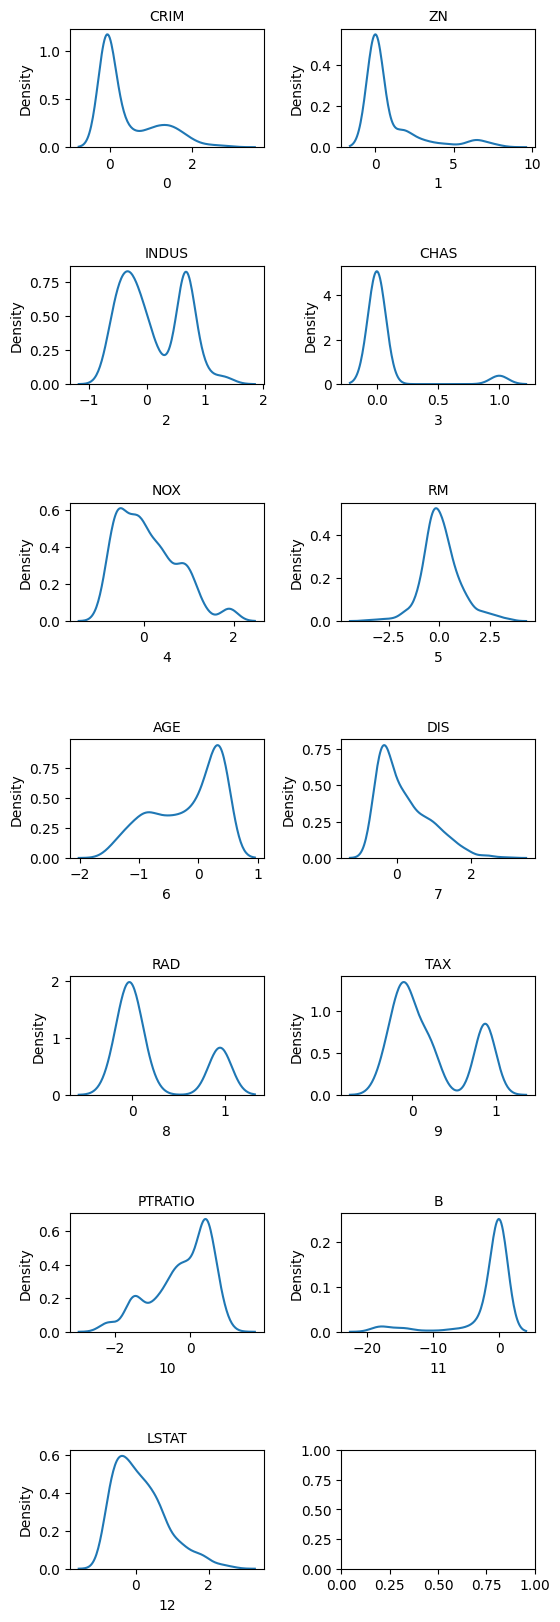

In [ ]:
fig, ax = plt.subplots(7, 2, figsize=(6, 20))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요.
plt.subplots_adjust(wspace=0.4, hspace=1)
# id 변수(count==0인 경우)는 제외하고 분포를 확인
count = 0
for row in range(7):
    for col in range(2):
        sns.kdeplot(data=data[count], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=10)
        count += 1
        if count == 13 :
            break


<Axes: xlabel='MEDV', ylabel='Density'>

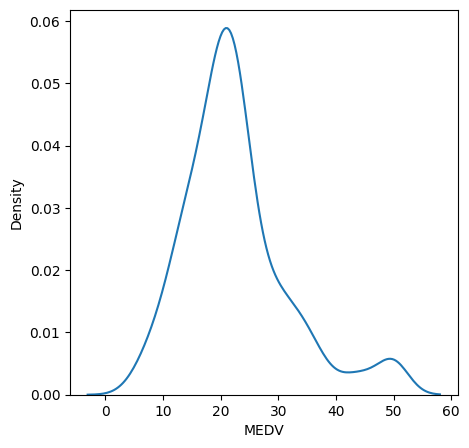

In [ ]:
fix, ax = plt.subplots(1,1,figsize=(5,5))
sns.kdeplot(data=y, ax=ax)

In [13]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

In [39]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [40]:
random_state=2023
gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lgb = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lgb, rdforest]

In [16]:
# grid_model = GridSearchCV(models, param_grid=param_grid, \
#                         scoring='neg_mean_squared_error', \
#                         cv=5, verbose=1, n_jobs=5)

# grid_model.fit(X, y)

param_lgb = {"learning_rate" : [0.01,0.1,0.2,0.3,0.4,0.5],
             "max_depth" : [1, 3, 5, 7, 9, 25, 50, 75],
             "num_leaves" : [100,300,500,900,1200],
             "n_estimators" : [100, 200, 300,500,800,1000],
             "learning_rate" : [0.01,0.1,0.2,0.3,0.4,0.5],
             "loss":['squared_error', 'absolute_error', 'huber', 'quantile']
              }



gscv_lgb = GridSearchCV (estimator = lgb, param_grid = param_lgb, scoring ='neg_mean_squared_error', cv = 3, refit=True, n_jobs=1, verbose=2)
gscv_lgb.fit(X, y)
print('LGB 파라미터: ', gscv_lgb.best_params_)
print('LGB 예측 정확도: {:.4f}'.format(gscv_lgb.best_score_))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[CV] END learning_rate=0.4, loss=absolute_error, max_depth=1, n_estimators=300, num_leaves=1200; total time=   0.0s
[CV] END learning_rate=0.4, loss=absolute_error, max_depth=1, n_estimators=300, num_leaves=1200; total time=   0.0s
[CV] END learning_rate=0.4, loss=absolute_error, max_depth=1, n_estimators=300, num_leaves=1200; total time=   0.0s
[CV] END learning_rate=0.4, loss=absolute_error, max_depth=1, n_estimators=500, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.4, loss=absolute_error, max_depth=1, n_estimators=500, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.4, loss=absolute_error, max_depth=1, n_estimators=500, num_leaves=100; total time=   0.0s
[CV] END learning_rate=0.4, loss=absolute_error, max_depth=1, n_estimators=500, num_leaves=300; total time=   0.0s
[CV] END learning_rate=0.4, loss=absolute_error, max_depth=1, n_estimators=500, num_leaves=300; total time=   0.0s
[CV] END learning_rate=0.4, loss=absolute

In [43]:
lgb_best = LGBMRegressor(learning_rate= 0.4, max_depth = 3, n_estimators = 100, num_leaves = 100, random_state=random_state, loss = 'squared_error')
lgb_best.fit(X,y)
predictions = lgb_best.predict(X_test)
# Create ID column
ID = ['TEST_{:03d}'.format(i) for i in range(len(test_data))]

# Save the predictions to a CSV file
submission = pd.DataFrame({'ID': ID, 'MEDV': predictions})
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/HousePrice/sample_submission.csv', index=False)


In [41]:
param_rd = {
    'n_estimators': [10, 50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

gscv_rd = GridSearchCV (estimator = rdforest, param_grid = param_rd, scoring ='neg_mean_squared_error', cv = 3, refit=True, n_jobs=1, verbose=2)
gscv_rd.fit(X, y)
print('RDforest 파라미터: ', gscv_rd.best_params_)


Fitting 3 folds for each of 864 candidates, totalling 2592 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=

In [42]:
rd_best = RandomForestRegressor(max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, n_estimators=150, bootstrap = True, max_features = 'auto')
rd_best.fit(X,y)
predictions = rd_best.predict(X_test)
# Create ID column
ID = ['TEST_{:03d}'.format(i) for i in range(len(X_test))]

# Save the predictions to a CSV file
submission = pd.DataFrame({'ID': ID, 'MEDV': predictions})
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/HousePrice/sample_submission.csv', index=False)